In [1]:
!pwd

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import sys, os
sys.path.append(os.path.join('..', '..'))

In [4]:
import Neal_exact_test_functions as net
import pandas as pd
import numpy as np
import timeit

In [5]:
bit = 20
num = 0

In [6]:
path = '../../../input/ost{}_{}.csv'.format(bit, num)
df = pd.read_csv(path, sep=',')
print('{}bit_{} datasets t_list is {}'.format(bit, num, net.calc_marginals(df)))

20bit_0 datasets t_list is [11  9  5]


In [7]:
t1 = np.dot(df['Y'], df['LI'])
print('{}bit_{} datasets t1 is {}'.format(bit, num, t1))

20bit_0 datasets t1 is 8


In [8]:
2**20

1048576

### 10000 num_reads

In [9]:
num_reads = 10000
res = net.make_res_data(df, num_reads)

In [10]:
valid_y_list, valid_y_num, occurrence_list = net.find_valid_y(res)

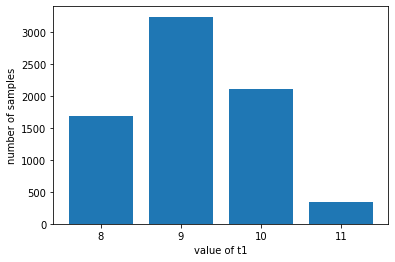

In [11]:
plot_path = 'nealSA_{}bit_{}_10000numreads'.format(bit, num)
hist_dic = net.y_num_hist(df, valid_y_list, plot_path)

In [12]:
hist_dic

{9: 3244, 10: 2118, 8: 1681, 11: 335}

In [13]:
valid_y_num

7378

In [14]:
valid_y_list

[[1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1],
 [1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0],
 [1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1],
 [0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1],
 [1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1],
 [0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0],
 [1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0],
 [1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0],
 [1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1],
 [0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1],
 [1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0],
 [1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1],
 [1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1],
 [0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1],
 [1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1],
 [1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1,

In [15]:
print('p value of {}bit_{} data is {}'.format(bit, num, hist_dic[int(t1)]/valid_y_num))

p value of 20bit_0 data is 0.22783952290593656


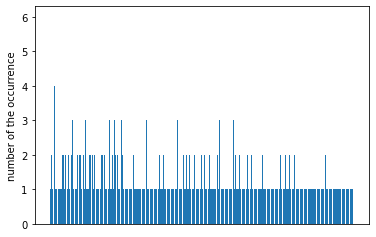

In [16]:
plot_path = 'nealSA_{}bit_{}_10000numreads_occurance_hist'.format(bit, num)
net.occurence_hist(occurrence_list, plot_path)

In [17]:
loop = 10
result = timeit.timeit('net.find_valid_y(res)', globals=globals(), number=loop)
reads10000_time = result / loop
print(reads10000_time, '秒')

6.384729686099999 秒


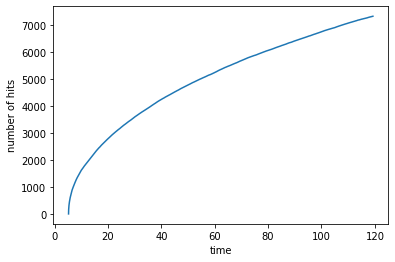

In [18]:
path='nealSA_{}bit_{}_10000numreads_num_time_transition'.format(bit, num)
valid_y_list, valid_y_num_list, time_list = net.time_num_y(df, num_reads, path)

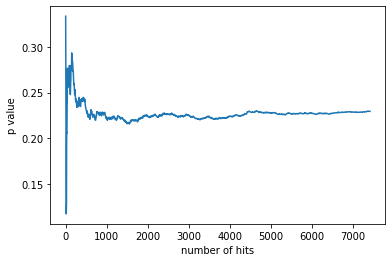

In [19]:
output_path='nealSA_{}bit_{}_10000numreads_p_value_transition'.format(bit, num)
valid_y_num, valid_y_list, p_dic = net.p_value_transition(df, num_reads, output_path)